<a href="https://colab.research.google.com/github/Harshini-R-SpireNSavvy/P1/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

# Option 1: Use raw string (best way on Windows)
df = pd.read_csv("netflix_titles.csv")

print(df.head())


    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  Un

# New section

In [18]:
import pandas as pd

df_boston = pd.read_csv("/Boston House Prices.csv")
df_boston.head()


,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2


In [22]:
import pandas as pd
df_boston = pd.read_csv('/Boston House Prices.csv')
df_boston

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


**Linear Regression with Statsmodels**


In [23]:
import statsmodels.api as sm



Simple Linear Regression
Define the dependent and independent variable

In [24]:
y = df_boston['Value'] # dependent variable
x = df_boston['Rooms'] # independent variable

<Axes: xlabel='Rooms', ylabel='Value'>

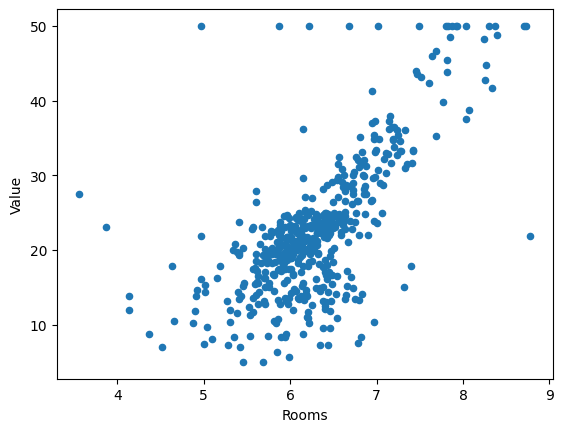

In [28]:
# Dependent and independent variables
y = df_boston['Value']
x = df_boston['Rooms']

# Scatter plot
df_boston.plot(
    kind='scatter',
    x='Rooms',
    y='Value'
)


In [27]:
import statsmodels.api as sm

# independent & dependent variables
x = df_boston['Rooms']
y = df_boston['Value']

# add a constant to the predictor
x = sm.add_constant(x)

# fit the model
lm = sm.OLS(y, x).fit()

# model summary
print(lm.summary())

# make predictions
y_pred = lm.predict(x)
print(y_pred[:10])  # show first 10 predictions


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           2.49e-74
Time:                        08:48:05   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [29]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           2.49e-74
Time:                        08:48:50   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

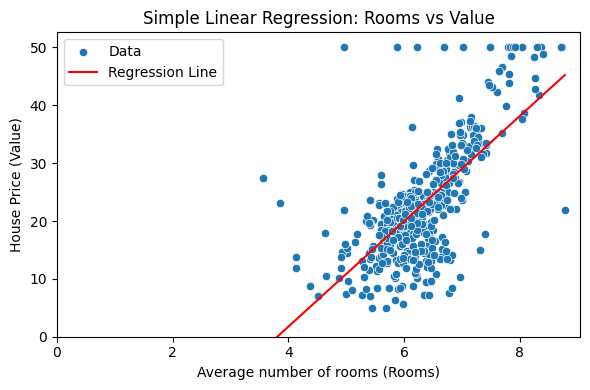

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# keep original Rooms column
rooms = df_boston['Rooms']

# Linear equation: y = ax + b
y_pred = 9.1021 * rooms - 34.6706

# plotting the data points
plt.figure(figsize=(6, 4), tight_layout=True)
sns.scatterplot(x=rooms, y=y, label="Data")

# plotting the regression line
sns.lineplot(x=rooms, y=y_pred, color='red', label="Regression Line")

# axes
plt.xlim(0)
plt.ylim(0)
plt.xlabel("Average number of rooms (Rooms)")
plt.ylabel("House Price (Value)")
plt.title("Simple Linear Regression: Rooms vs Value")
plt.legend()
plt.show()
